In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


## Data import

In [2]:
credit_data = pd.read_csv("/kaggle/input/credit-card-approval-prediction/credit_record.csv")
application_data = pd.read_csv("/kaggle/input/credit-card-approval-prediction/application_record.csv")

## Exploratory analysis

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [4]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


In [6]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


<AxesSubplot:>

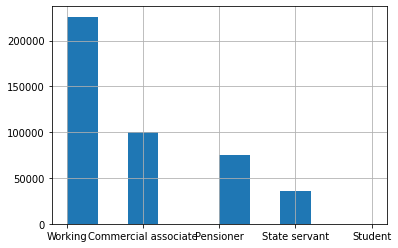

In [9]:
application_data['NAME_INCOME_TYPE'].hist()

<AxesSubplot:>

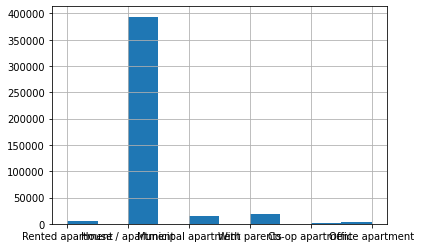

In [10]:
application_data['NAME_HOUSING_TYPE'].hist()

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

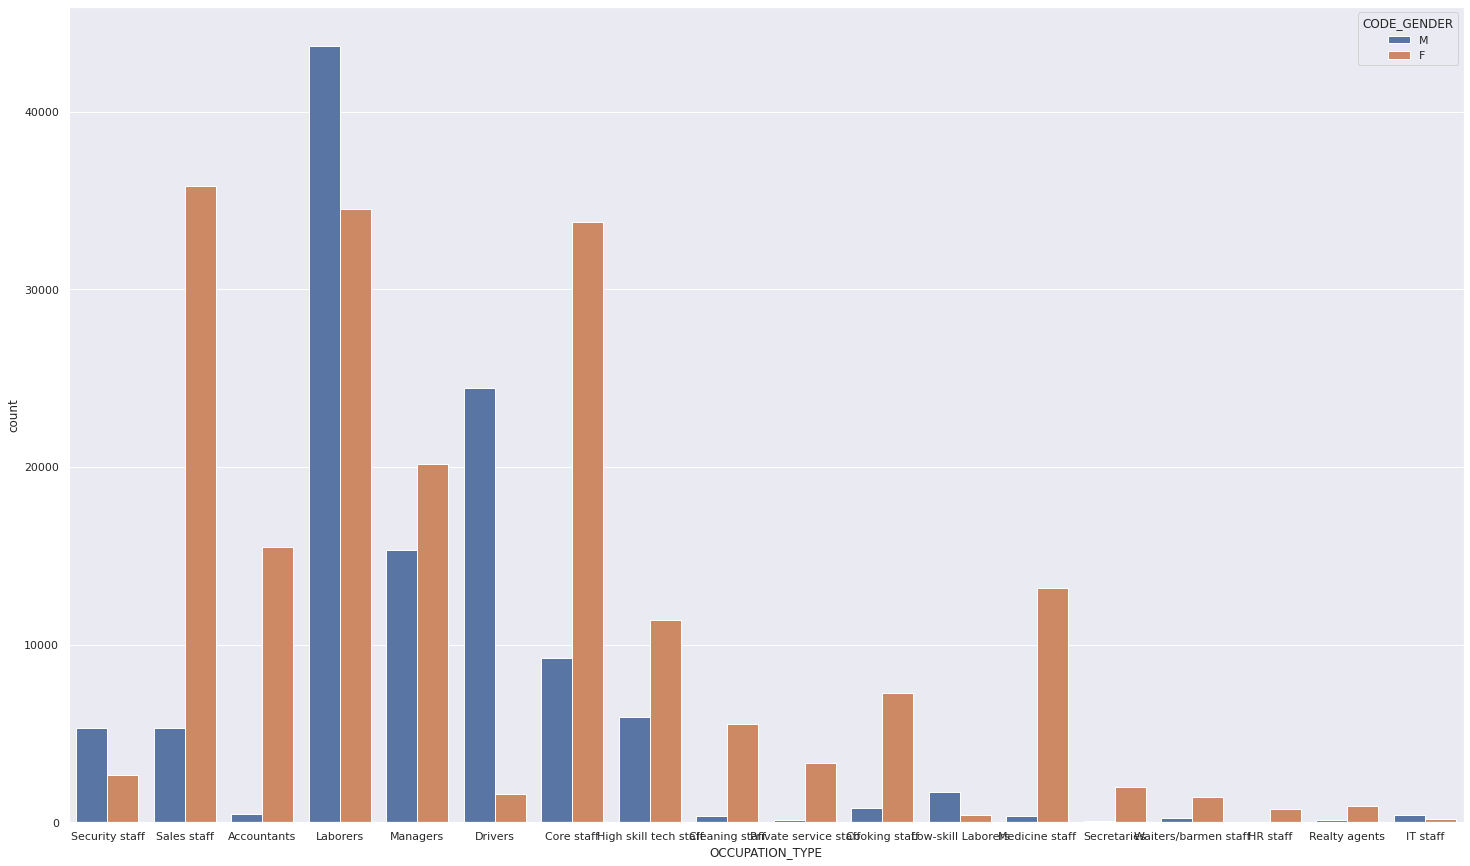

In [11]:
sns.set(rc={'figure.figsize':(25,15)})
sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=application_data)

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

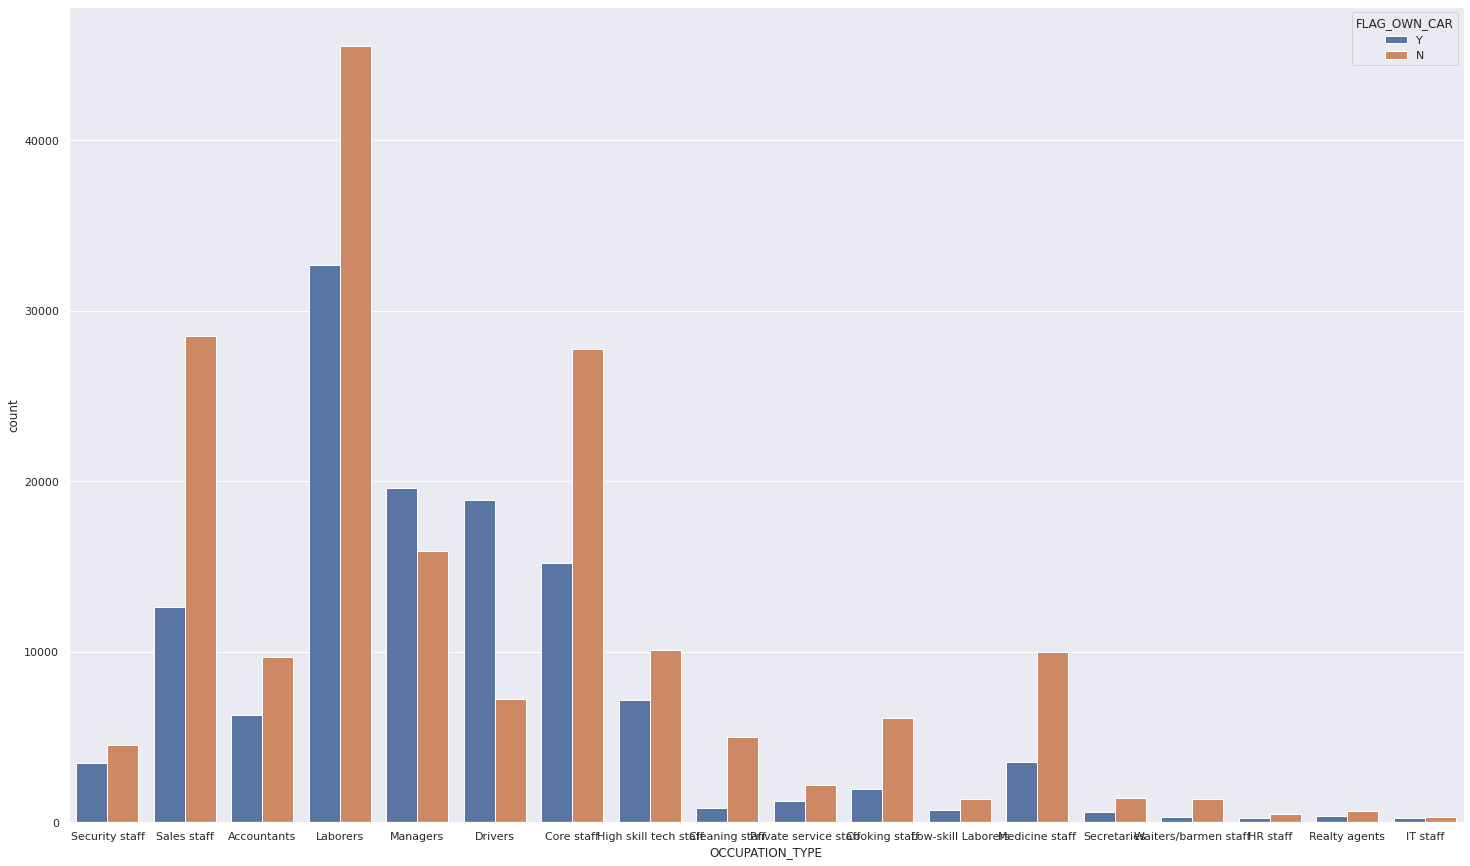

In [12]:
sns.set(rc={'figure.figsize':(25,15)})
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=application_data)

## Data cleaning and preparation 
### (we consider as bad customers the ones with more than 30 days of overdue payments)

In [13]:
df = pd.DataFrame(credit_data.groupby(["ID", "STATUS"])["STATUS"].count()).rename(columns={'STATUS': 'Freq'}).reset_index()
df["STATUS"] = df["STATUS"].map({"X":1, "C":1, "0":1, "1":0, "2":0, "3":0, "4":0, "5":0})
df = pd.DataFrame(df.groupby(["ID", "STATUS"])["Freq"].sum()).reset_index().sort_values(by=["ID", "Freq"], ascending = False)
df = df.drop_duplicates(subset=["ID"])
df = df.drop("Freq",axis=1)
df

,ID,STATUS
51333,5150487,1
51332,5150485,1
51331,5150484,1
51330,5150483,1
51329,5150482,1
...,...,...
4,5001715,1
3,5001714,1
2,5001713,1
1,5001712,1


In [14]:
df["STATUS"].value_counts()

1    45800
0      185
Name: STATUS, dtype: int64

In [15]:
application_data.drop_duplicates(subset=list(set(application_data.columns) - {'ID'}), inplace=True)
application_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0
438545,6839651,F,N,Y,3,99000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-18832,365243,1,0,0,0,NaN,1.0
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,NaN,2.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [16]:
merged_df = pd.merge(left=application_data, right=df, how="inner", on="ID")
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,1,0,0,0,Laborers,2.0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,1,0,NaN,2.0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0


In [17]:
merged_df.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        2994
CNT_FAM_MEMBERS           0
STATUS                    0
dtype: int64

In [18]:
##Convert fields values and cast them into the right data types
merged_df['CODE_GENDER'].replace('M',0,inplace=True)
merged_df['CODE_GENDER'].replace('F',1,inplace=True)
merged_df['FLAG_OWN_CAR'].replace('Y',0,inplace=True)
merged_df['FLAG_OWN_CAR'].replace('N',1,inplace=True)
merged_df['FLAG_OWN_REALTY'].replace('Y',0,inplace=True)
merged_df['FLAG_OWN_REALTY'].replace('N',1,inplace=True)
merged_df['NAME_INCOME_TYPE'] = merged_df['NAME_INCOME_TYPE'].astype('category')
merged_df['NAME_EDUCATION_TYPE'] = merged_df['NAME_EDUCATION_TYPE'].astype('category')
merged_df['NAME_FAMILY_STATUS'] = merged_df['NAME_FAMILY_STATUS'].astype('category')
merged_df['NAME_HOUSING_TYPE'] = merged_df['NAME_HOUSING_TYPE'].astype('category')
merged_df['OCCUPATION_TYPE'] = merged_df['OCCUPATION_TYPE'].astype('category')

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   9709 non-null   int64   
 1   CODE_GENDER          9709 non-null   int64   
 2   FLAG_OWN_CAR         9709 non-null   int64   
 3   FLAG_OWN_REALTY      9709 non-null   int64   
 4   CNT_CHILDREN         9709 non-null   int64   
 5   AMT_INCOME_TOTAL     9709 non-null   float64 
 6   NAME_INCOME_TYPE     9709 non-null   category
 7   NAME_EDUCATION_TYPE  9709 non-null   category
 8   NAME_FAMILY_STATUS   9709 non-null   category
 9   NAME_HOUSING_TYPE    9709 non-null   category
 10  DAYS_BIRTH           9709 non-null   int64   
 11  DAYS_EMPLOYED        9709 non-null   int64   
 12  FLAG_MOBIL           9709 non-null   int64   
 13  FLAG_WORK_PHONE      9709 non-null   int64   
 14  FLAG_PHONE           9709 non-null   int64   
 15  FLAG_EMAIL           

In [20]:
merged_df['FLAG_MOBIL'].value_counts()

1    9709
Name: FLAG_MOBIL, dtype: int64

<AxesSubplot:>

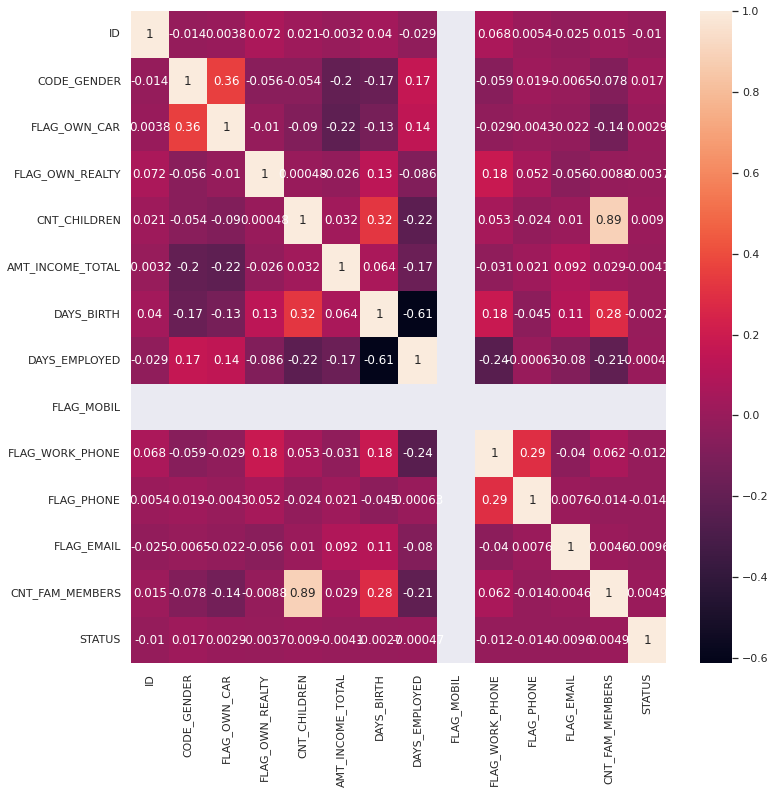

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(merged_df.corr(),annot=True)

In [22]:
##We drop the following columns as containing too many null values or without any usefulness in the model training
merged_df.drop(["FLAG_MOBIL","OCCUPATION_TYPE", "ID"],axis=1,inplace=True)

In [23]:
merged_df = pd.get_dummies(merged_df, columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'], drop_first = True)

## Data modelling and prediction

In [24]:
from sklearn.ensemble import RandomForestClassifier 
x = merged_df.drop("STATUS", axis=1)
y = merged_df["STATUS"]
classifier = RandomForestClassifier()
classifier.fit(x, y)
classifier.score(x, y)

1.0

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


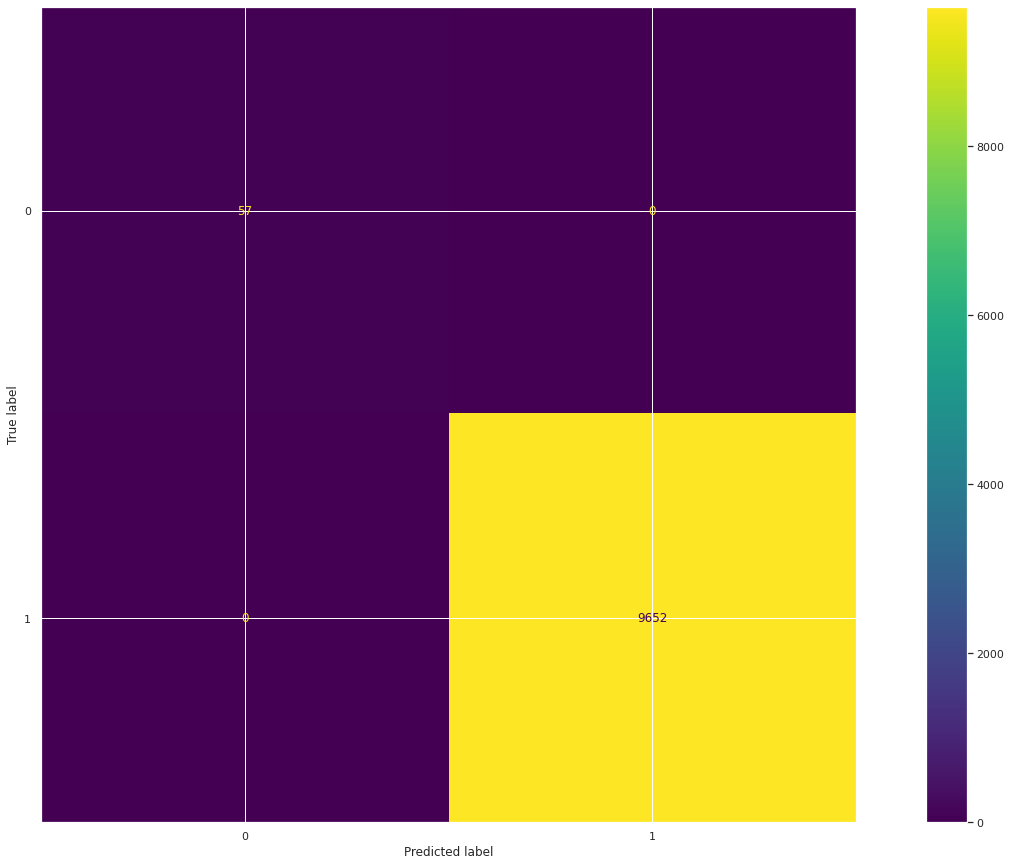

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(classifier, x, y)

### As we can see from the above confusion matrix, we have a data imbalance pb to deal with with too few samples with the target variable status at 0 --> Model trained biased

### **One solution is the under sampling of the class in majority**

In [26]:
from imblearn.under_sampling import NearMiss

In [27]:
undersample = NearMiss(version=1, n_neighbors=3)
x_new, y_new = undersample.fit_resample(x, y)

y_new.value_counts()

0    57
1    57
Name: STATUS, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 2)

### Logistic Regression

Accuracy Score is 0.72414
    0  1
0  12  8
1   0  9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8

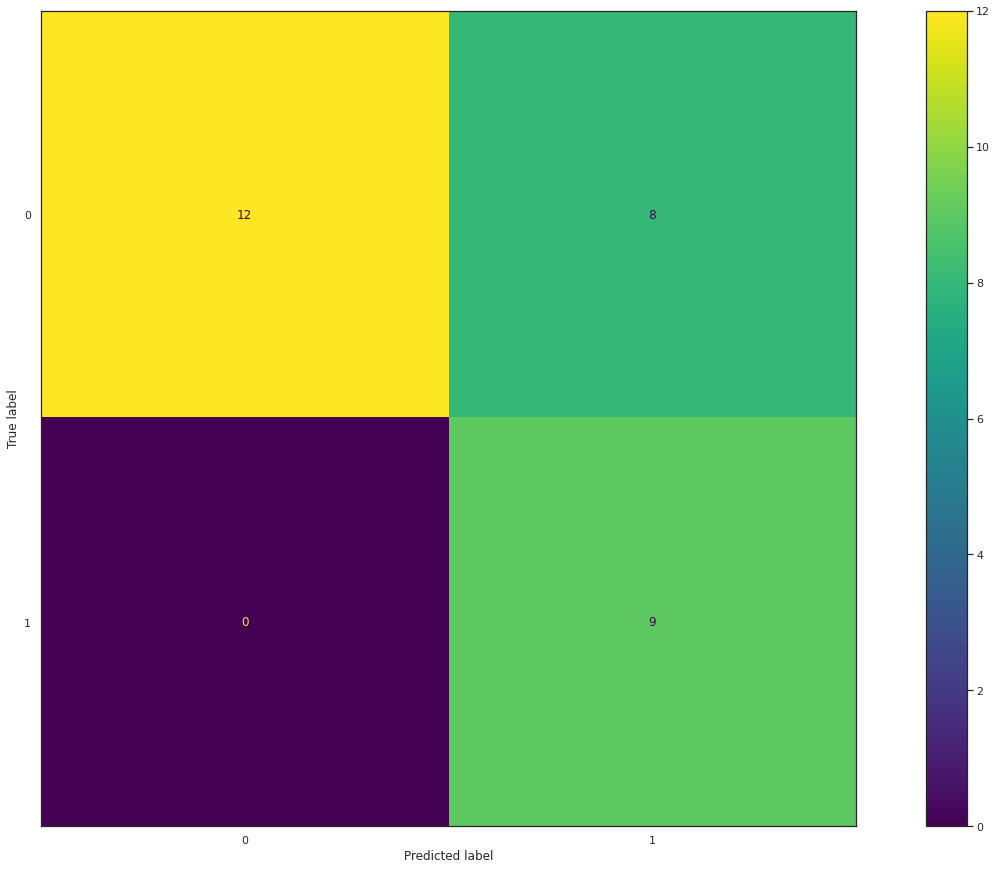

In [29]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(model,x_test,y_test)
roc_auc_score(y_test, y_predict)

### DecisionTreeClassifier

Accuracy Score is 1.0
    0  1
0  20  0
1   0  9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


1.0

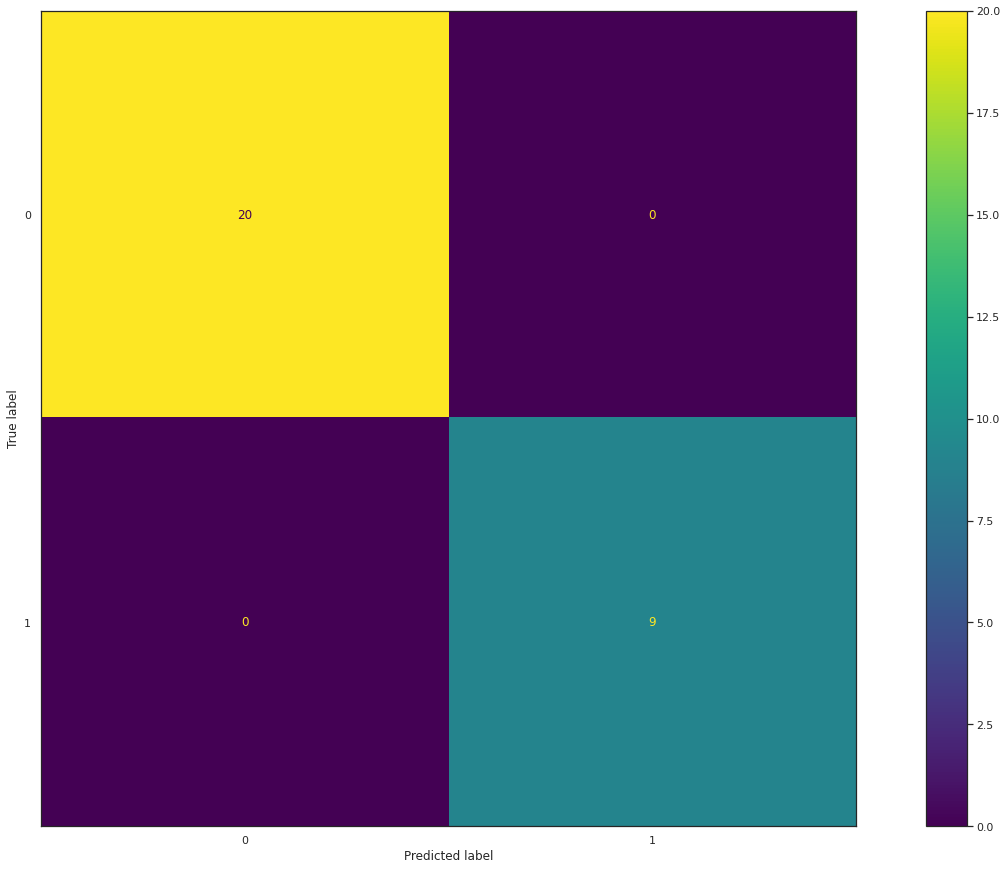

In [30]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model,x_test,y_test)

roc_auc_score(y_test, y_predict)

### Random Forest Classifier

Accuracy Score is 0.75862
    0  1
0  13  7
1   0  9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.825

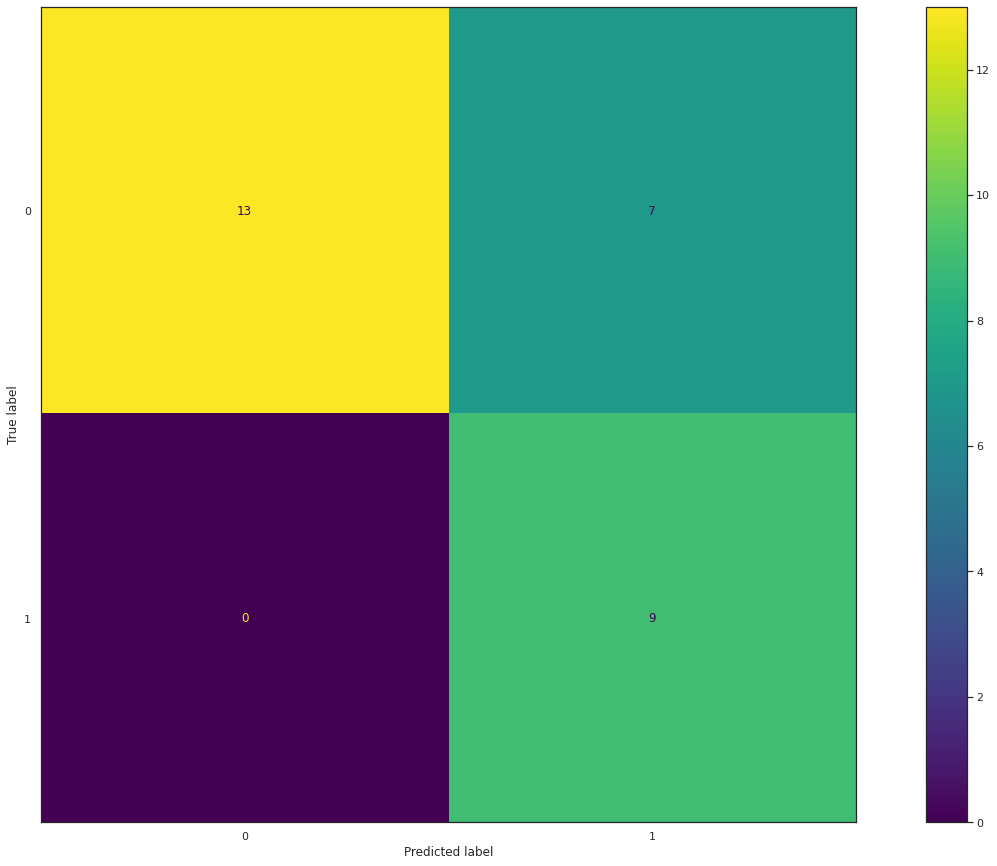

In [31]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model,x_test,y_test)

roc_auc_score(y_test, y_predict)

### SVM classifier

Accuracy Score is 0.89655
    0  1
0  17  3
1   0  9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9249999999999999

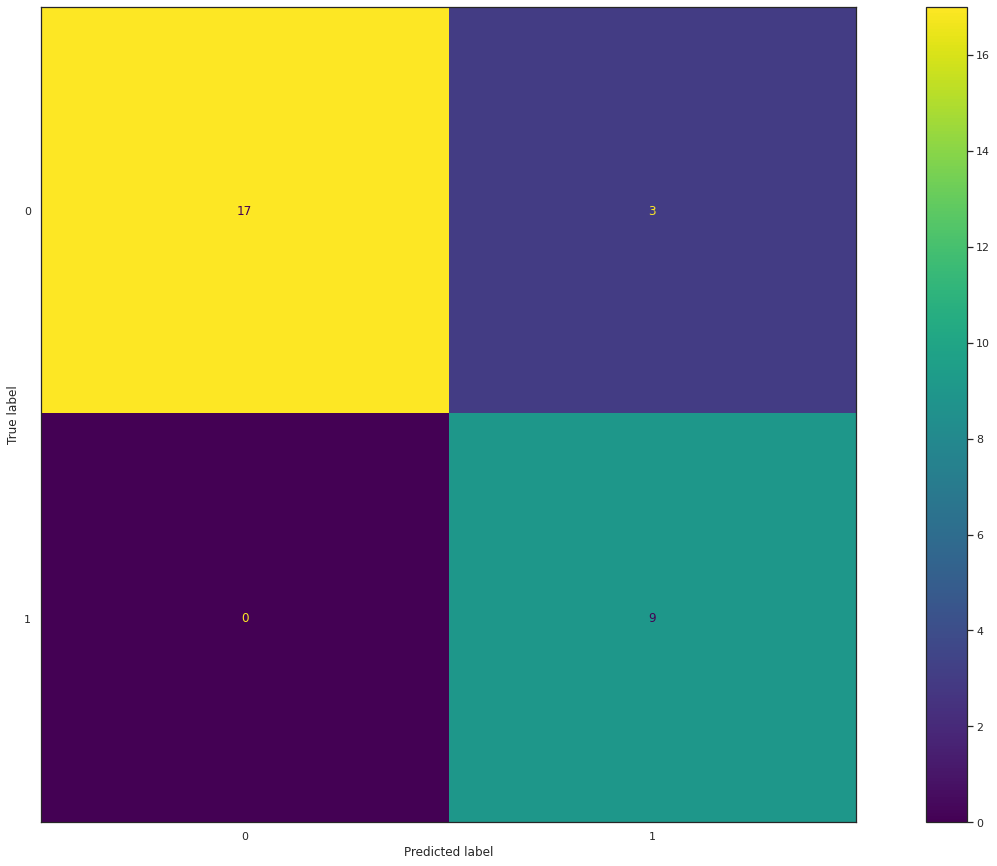

In [32]:
model = svm.SVC(C = 0.8,
                kernel='linear')
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model,x_test,y_test)

roc_auc_score(y_test, y_predict)

### XGBoost classifier

Accuracy Score is 0.89655
    0  1
0  18  2
1   1  8


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8944444444444444

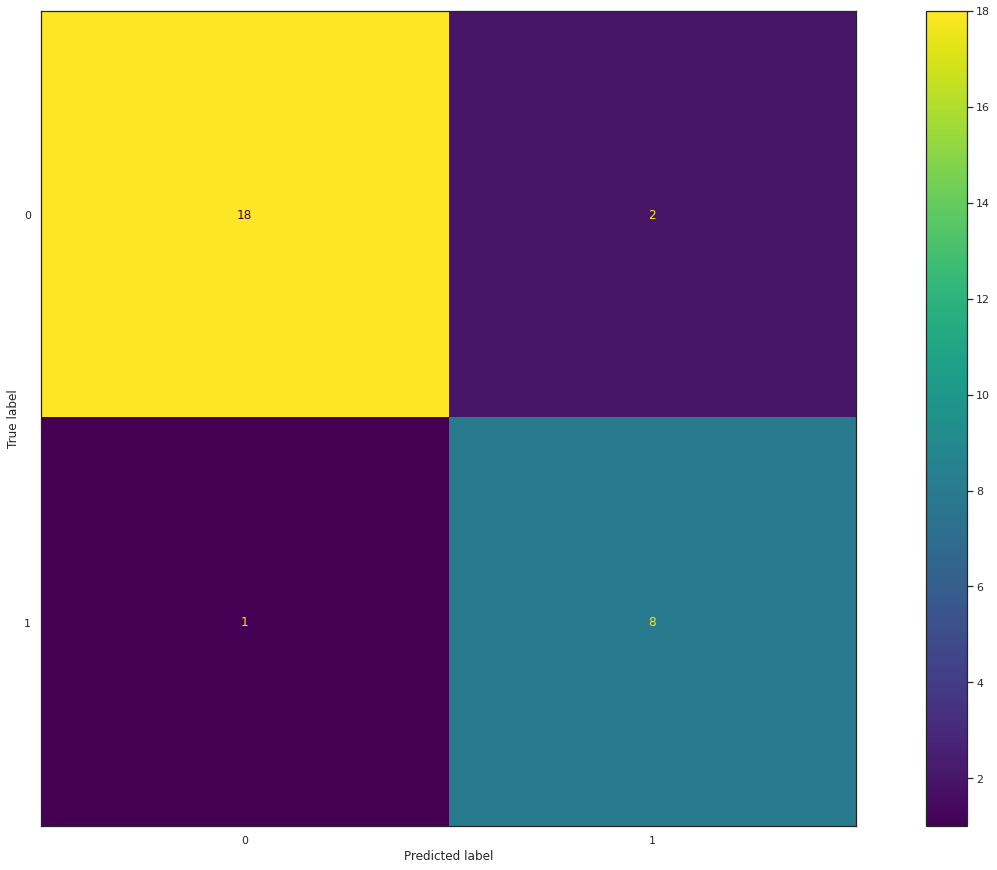

In [33]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model,x_test,y_test)

roc_auc_score(y_test, y_predict)

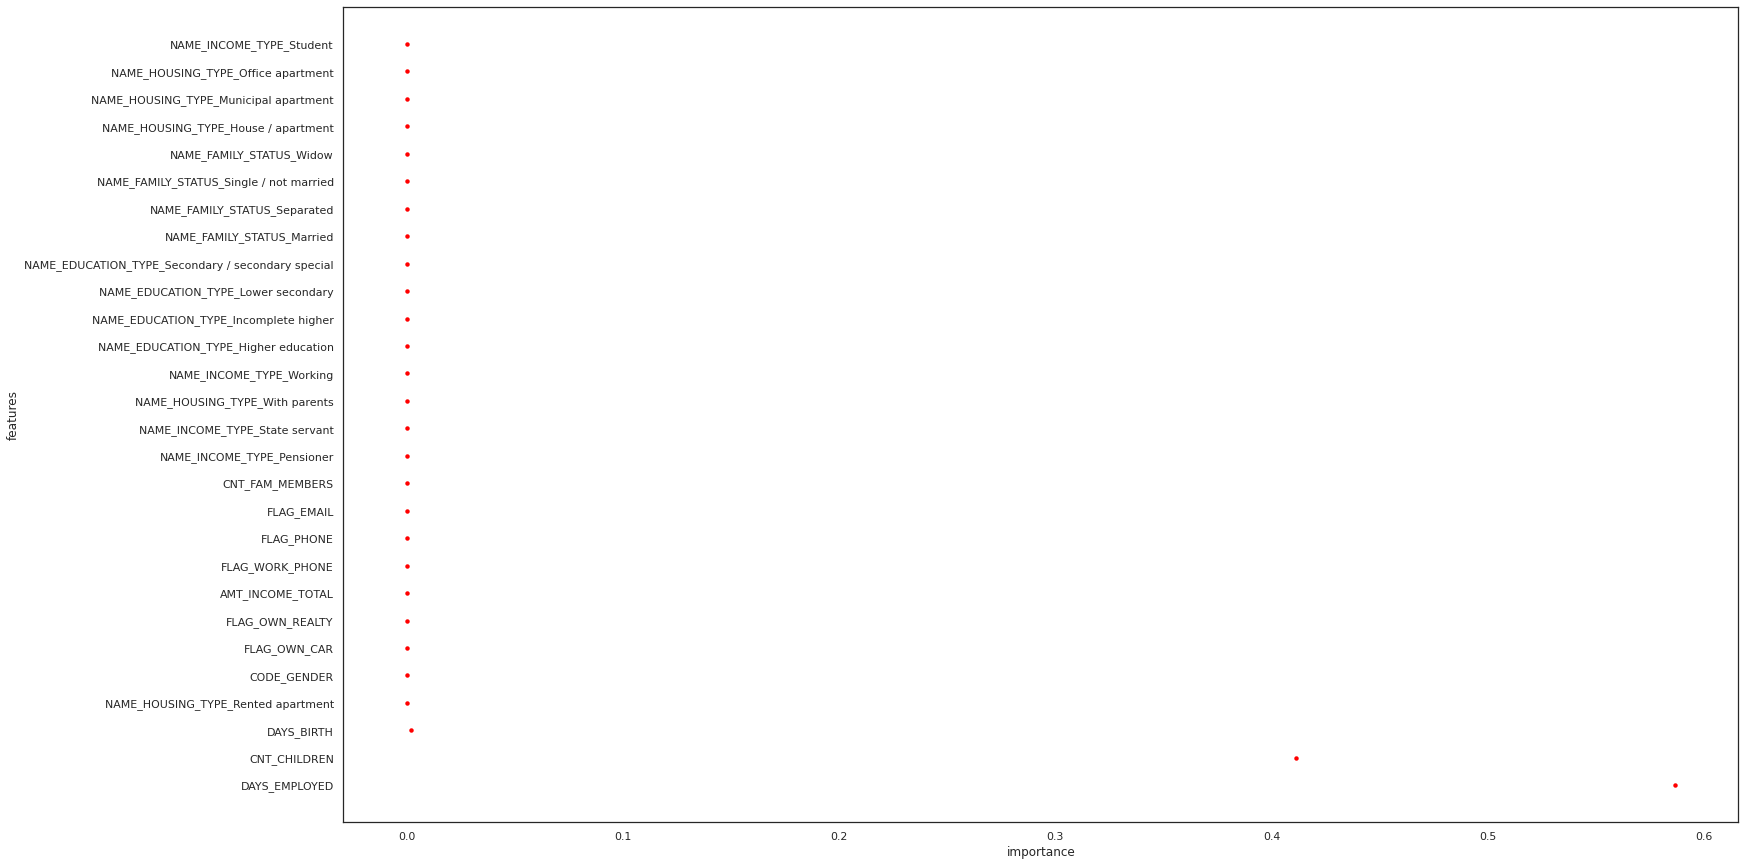

In [34]:
def plot_importance(classifer, x_train, point_size = 25):
    '''plot feature importance'''
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = imp,s = point_size, color='red').set(
    xlabel='importance', 
    ylabel='features')

plot_importance(model, x_train, 20)   

## Conclusion

Accuracy Score is 1.0
    0  1
0  20  0
1   0  9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


1.0

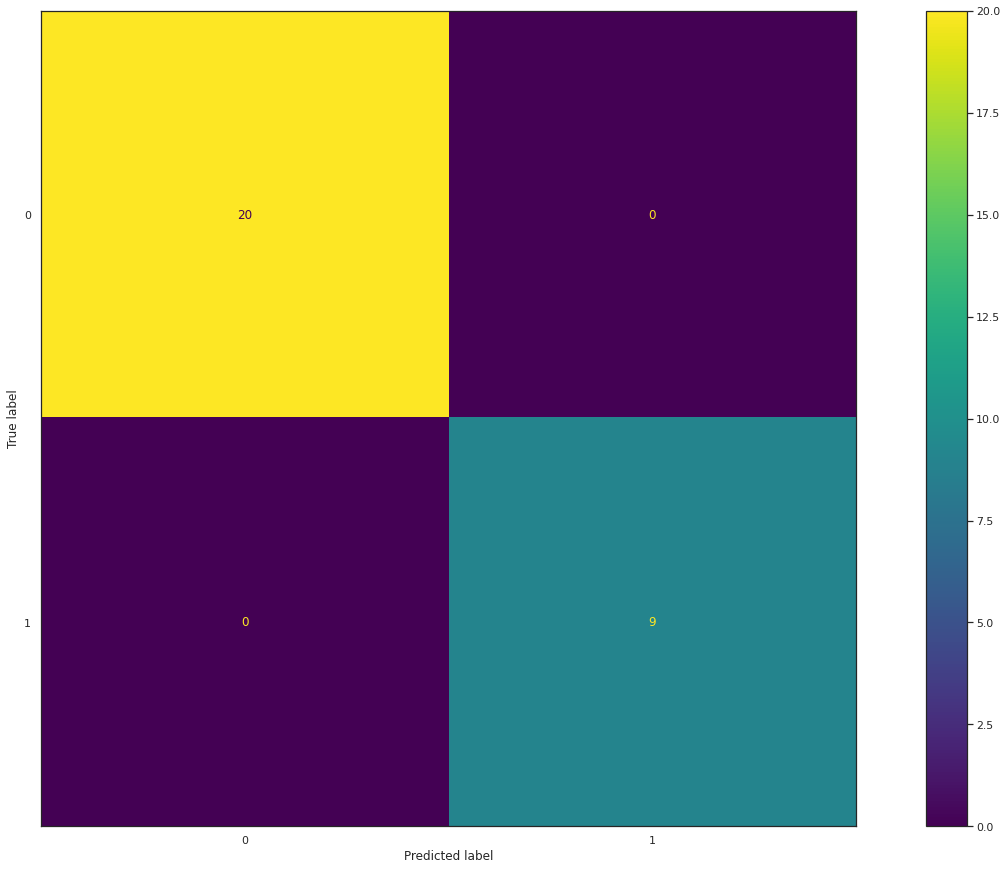

In [35]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model,x_test,y_test)

roc_auc_score(y_test, y_predict)

### The best model to predict bad/good card customers is the Decision Tree Classifier with an accuracy score of 1 and a ROC of 1.
### As a next step, we could further assess that the model if not overfit and too fitted to the training dataset by setting up
### a cross validation process.